# *Feed Forward* DNN

A continuación se evalua la red neuronal hiperparametrizada con el conjunto de test.

## Librerías necesarias

In [1]:
import gc
import math
import pandas as pd
from glob import glob
from os import getcwd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import sklearn
import keras
from sklearn.metrics import f1_score, make_scorer
from keras.models import load_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

pd.set_option("display.max_columns", 80)

In [2]:
import itertools
def plot_confusion_matrix(cm, title, classes=['normal', 'abnormal'], save=False, save_as='MyFigure.png', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    
    fmt = '.1%'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i,j] > thresh else 'black')
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if save:
        plt.savefig(save_as, dpi=100)

## Carga del modelo

In [3]:
seed = 0
np.random.seed(seed)

In [4]:
dnn = tf.keras.models.load_model('/home/jovyan/My-Notebooks/Signature Detection/dnn-hyper-trained')

In [5]:
dnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 22)                0         
                                                                 
 dense (Dense)               (None, 448)               10304     
                                                                 
 dense_1 (Dense)             (None, 384)               172416    
                                                                 
 dropout (Dropout)           (None, 384)               0         
                                                                 
 dense_2 (Dense)             (None, 480)               184800    
                                                                 
 dense_3 (Dense)             (None, 160)               76960     
                                                                 
 dropout_1 (Dropout)         (None, 160)               0


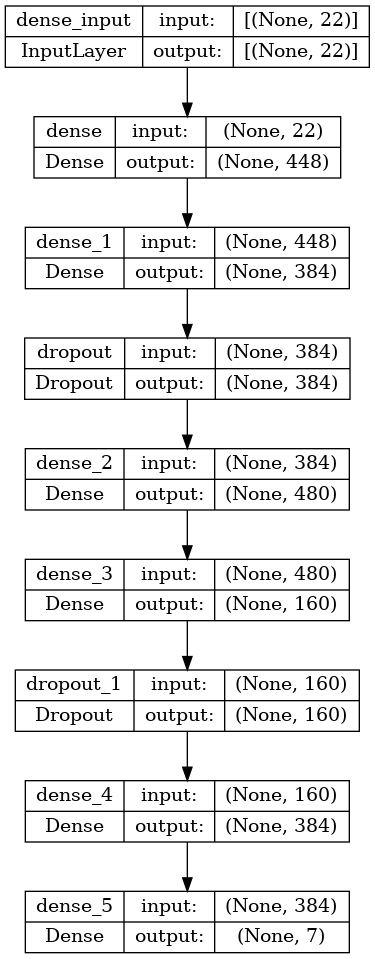

### Evaluación

In [6]:
df = pd.read_csv('../Data Preprocess/train-SD-reduced.csv', sep=',', low_memory=False)
y_train = df.pop('Label')
X_train = df.values

In [7]:
%%time
predictions = dnn.predict(X_train)
predictions = predictions.argmax(axis=1)

218750/218750 [==============================] - 444s 2ms/step
CPU times: user 12min 42s, sys: 1min 49s, total: 14min 32s
Wall time: 7min 57s


              precision    recall  f1-score   support

           0    0.58334   0.98371   0.73238   1000000
           1    0.91445   0.99821   0.95450   1000000
           2    0.99831   0.97967   0.98890   1000000
           3    0.99977   0.99916   0.99946   1000000
           4    0.99758   0.90733   0.95032   1000000
           5    0.95934   0.29875   0.45562   1000000
           6    0.97518   0.99511   0.98505   1000000

    accuracy                        0.88028   7000000
   macro avg    0.91828   0.88028   0.86660   7000000
weighted avg    0.91828   0.88028   0.86660   7000000



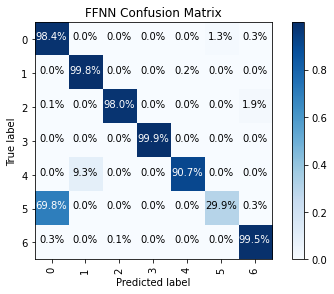

In [8]:
print(classification_report(y_train, predictions, digits=5))
cm = confusion_matrix(y_train, predictions)
plot_confusion_matrix(cm, title='FFNN Confusion Matrix', classes=['0', '1', '2', '3', '4', '5', '6'])

### Carga del conjunto de test

In [9]:
df = pd.read_csv('../Data Preprocess/test-SD.csv', sep=',', low_memory=False)
y_test = df.pop('Label')
X_test = df.values

### Evaluación

In [21]:
%%time
predictions = dnn.predict(X_test)

136848/136848 [==============================] - 279s 2ms/step
CPU times: user 7min 52s, sys: 1min 11s, total: 9min 3s
Wall time: 5min


In [11]:
predictions = predictions.argmax(axis=1)

In [12]:
print(classification_report(y_test, predictions, digits=5))

              precision    recall  f1-score   support

           0    0.99144   0.98377   0.98759   3567467
           1    0.94304   0.99821   0.96984    190047
           2    0.99767   0.98012   0.98882    378823
           3    0.99058   0.99916   0.99485     85642
           4    0.99466   0.90715   0.94890    114201
           5    0.22033   0.29892   0.25368     42681
           6    0.01524   0.98889   0.03002       270

    accuracy                        0.97571   4379131
   macro avg    0.73614   0.87946   0.73910   4379131
weighted avg    0.98237   0.97571   0.97885   4379131



In [13]:
len(np.where(y_test == predictions)[0]) / len(y_test) * 100

97.57077374483659

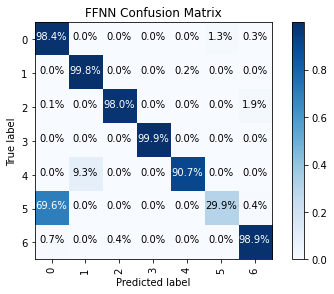

In [14]:
cm = confusion_matrix(y_test, predictions)
plot_confusion_matrix(cm, title='FFNN Confusion Matrix', classes=['0', '1', '2', '3', '4', '5', '6'])

In [15]:
dos_data = X_test[np.where(y_test == 1)]
preds = dnn.predict(dos_data).argmax(axis=1)

print("Precision on DoS attacks: " + str(len(np.where(preds == 1)[0]) / len(dos_data) * 100) + "%.")

5939/5939 [==============================] - 11s 2ms/step
Precision on DoS attacks: 99.82109688655964%.


In [16]:
ddos_data = X_test[np.where(y_test == 2)]
preds = dnn.predict(ddos_data).argmax(axis=1)

print("Precision on DDoS attacks: " + str(len(np.where(preds == 2)[0]) / len(ddos_data) * 100) + "%.")

11839/11839 [==============================] - 24s 2ms/step
Precision on DDoS attacks: 98.01200032732964%.


In [17]:
botnet_data = X_test[np.where(y_test == 3)]
preds = dnn.predict(botnet_data).argmax(axis=1)

print("Precision on Botnet attacks: " + str(len(np.where(preds == 3)[0]) / len(botnet_data) * 100) + "%.")

2677/2677 [==============================] - 6s 2ms/step
Precision on Botnet attacks: 99.91592910020785%.


In [18]:
bruteforce_data = X_test[np.where(y_test == 4)]
preds = dnn.predict(bruteforce_data).argmax(axis=1)

print("Precision on Bruteforce attacks: " + str(len(np.where(preds == 4)[0]) / len(bruteforce_data) * 100) + "%.")

3569/3569 [==============================] - 7s 2ms/step
Precision on Bruteforce attacks: 90.71549285908179%.


In [19]:
infiltration_data = X_test[np.where(y_test == 5)]
preds = dnn.predict(infiltration_data).argmax(axis=1)

print("Precision on Infiltration attacks: " + str(len(np.where(preds == 5)[0]) / len(infiltration_data) * 100) + "%.")

1334/1334 [==============================] - 3s 2ms/step
Precision on Infiltration attacks: 29.891520817225466%.


In [20]:
web_data = X_test[np.where(y_test == 6)]
preds = dnn.predict(web_data).argmax(axis=1)

print("Precision on Web attacks: " + str(len(np.where(preds == 6)[0]) / len(web_data) * 100) + "%.")

9/9 [==============================] - 0s 2ms/step
Precision on Web attacks: 98.88888888888889%.
